## <ins>**Dataframes**</ins>

Container for *two-dimensional, size-mutable, potentially heterogeneous, labelled tabular* data, part of the Pandas library, one of the most popular libraries for working with large quantities of data. In a way, it is similar to a spreadsheet.


We use NumPy with Pandas for fast creation and manipulation of arrays and matrices of numbers.

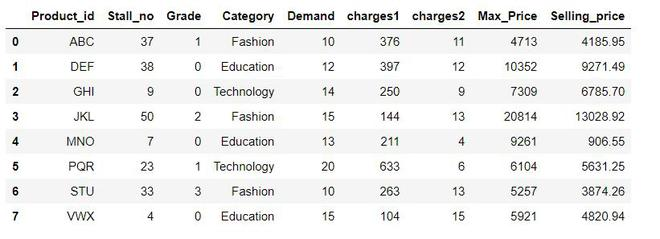

[Source](https://www.geeksforgeeks.org/how-to-pretty-print-an-entire-pandas-series-or-dataframe/)

Axis 0 in Pandas operations is applicable on rows, and 1 is for columns.

To work on DataFrames, we must have Pandas installed in our system. We can use `pip` to install it by running the following command:

In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)

1.5.3


 **CONSTRUCTION**

**Syntax**:

`pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)`

A dataframe can be constructed in various different ways:
1. Using a dictionary of Pandas Series:

**Note:**

`np.ndarray` is an actual data type while `np.array()` is a function to make arrays from other data structures.


In [2]:
#using a dictionary of series:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
df = pd.DataFrame(data)
print(df)



   calories  duration
0       420        50
1       380        40
2       390        45


2. Series can be used in many ways to construct dataframes.

In [3]:

#another way to selectively construct using series
ser = pd.Series([1, 2, 3], index=["a", "b", "c"])
df1 = pd.DataFrame(data=ser, index=["a", "c"])
print(df1)

   0
a  1
c  3


3. NumPy is a versatile library that can also be used to create dataframes using pre-existing arrays.

In [4]:
#using numpy arrays
df2 = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]), columns=['a','b','c'])
#the above columns argument is optional, and the default is assigned range values
print(df2)


   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


4. You can read from a variety of input types, such as CSVs, Excel spreadsheets, etc. using the `pd.read_input()` function.

In [5]:
#loading csv files
df3 = pd.read_csv("./data/file_path.csv")
print(df3)

       Name  Age  Gender           City          Occupation
0     Alice   25  Female       New York   Software Engineer
1       Bob   30    Male  San Francisco      Data Scientist
2   Charlie   28    Male    Los Angeles    Graphic Designer
3     David   22    Male        Chicago             Student
4       Eva   35  Female          Miami   Marketing Manager
5     Frank   40    Male         Boston          Accountant
6     Grace   32  Female        Seattle     Product Manager
7     Harry   27    Male         Austin       Web Developer
8       Ivy   29  Female         Denver             Teacher
9      Jack   31    Male       Portland           Architect
10    Katie   26  Female        Atlanta       HR Specialist
11      Leo   34    Male         Dallas   Financial Analyst
12      Mia   33  Female        Phoenix               Nurse
13     Noah   24    Male        Houston  Software Developer
14   Olivia   36  Female      San Diego         UX Designer
15    Peter   28    Male   Philadelphia 

5. You can also create a dataframe using a list of lists.

In [6]:
data = [
    ['Alice', 25, 'Engineer'],
    ['Bob', 30, 'Doctor'],
    ['Charlie', 22, 'Student'],
]

# Define column names
columns = ['Name', 'Age', 'Occupation']

# Create a DataFrame
df4 = pd.DataFrame(data, columns=columns)
print(df4)


      Name  Age Occupation
0    Alice   25   Engineer
1      Bob   30     Doctor
2  Charlie   22    Student


**ATTRIBUTES AND BASIC INTERACTIONS**

A dataframe has many methods that let you interact and modify its characteristics.

1. Basic information
2. Querying
3. Transformation
4. Deletion/Dropping
5. Aggregration
6. Cleaning
7. Output

**Note:**

The `shape` property is used to get a tuple representing the dimensionality of the Pandas DataFrame.

**OVERVIEW**
 
Many functions offer a quick overview of the entire dataframe, and some are listed down below.

In [7]:
#First n rows of dataframe
print(df2.head(n=5))
#Last n rows
print(df2.tail(n=5))
#Summary & other information
print(df2.info())

#Transpose
print(df2)
print(df2.T)

#List of axes of dataframe
print(df2.axes)
#list of columns of dataset
print(df2.columns)

#Datatypes in the dataframe
print(df2.dtypes)

#Check for empty
print(df2.empty)

#number of axes / array dimensions
print(df2.ndim)
#shape of the dataframe
print(df2.shape)

#insert a column into a dataframe, by default no duplicates are allowed
df2.insert(0, 'testcol', [1,2,3])
print(df2)



   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9
   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int32
 1   b       3 non-null      int32
 2   c       3 non-null      int32
dtypes: int32(3)
memory usage: 164.0 bytes
None
   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9
   0  1  2
a  1  4  7
b  2  5  8
c  3  6  9
[RangeIndex(start=0, stop=3, step=1), Index(['a', 'b', 'c'], dtype='object')]
Index(['a', 'b', 'c'], dtype='object')
a    int32
b    int32
c    int32
dtype: object
False
2
(3, 3)
   testcol  a  b  c
0        1  1  2  3
1        2  4  5  6
2        3  7  8  9


**ACCESS**

`loc` can access rows or columns based on labels, while `iloc` is purely integer based.

In `loc` slices, both **beginning and ending** are included.

In [8]:
print(df2,'\n','\n')
#Integer based in\dexing for selection by position
print(df2.iloc[0])

print(df2.iloc[0:2])#slice 
print(df2.iloc[[0,2]])#with a list of integers



   testcol  a  b  c
0        1  1  2  3
1        2  4  5  6
2        3  7  8  9 
 

testcol    1
a          1
b          2
c          3
Name: 0, dtype: int64
   testcol  a  b  c
0        1  1  2  3
1        2  4  5  6
   testcol  a  b  c
0        1  1  2  3
2        3  7  8  9


**Difference between loc and iloc**

`.loc[]` works on labels of your index. This means that if you give in `loc[2]`, you look for the values of your DataFrame that have an index labeled 2.


`.iloc[]` works on the positions in your index. This means that if you give in `iloc[2]`, you look for the values of your DataFrame that are at index ’2`

In [9]:
#Label based 
print(df2.loc[1]) 
#returns row with index 

print(df2.loc[[0,1]],"\n")
#returns another dataframe
print(df2.loc(axis=1)['testcol'],'#######')

#loc can also use conditionals

#You can also perform filtering and execute queries on the dataframe
print(df2[df2['a'] > 2]['b'])

#returns axis information
for i in df2:
    print(i)

testcol    2
a          4
b          5
c          6
Name: 1, dtype: int64
   testcol  a  b  c
0        1  1  2  3
1        2  4  5  6 

0    1
1    2
2    3
Name: testcol, dtype: int64 #######
1    5
2    8
Name: b, dtype: int32
testcol
a
b
c


In [10]:
#To access a specified row
#use iloc to select the row number
print(df2.iloc[1])

#To access a specified column
#use loc[column name]
print(df2.loc[:,'testcol'])

testcol    2
a          4
b          5
c          6
Name: 1, dtype: int64
0    1
1    2
2    3
Name: testcol, dtype: int64


In [11]:
#iterable of rows of a dataframe:
for i in df2.iterrows():
    print(i)

for i in df2.items():
    print(i)
    #iterators by column 

(0, testcol    1
a          1
b          2
c          3
Name: 0, dtype: int64)
(1, testcol    2
a          4
b          5
c          6
Name: 1, dtype: int64)
(2, testcol    3
a          7
b          8
c          9
Name: 2, dtype: int64)
('testcol', 0    1
1    2
2    3
Name: testcol, dtype: int64)
('a', 0    1
1    4
2    7
Name: a, dtype: int32)
('b', 0    2
1    5
2    8
Name: b, dtype: int32)
('c', 0    3
1    6
2    9
Name: c, dtype: int32)


**ADDING DATA**

When we create a DataFrame, we can add input to the `index` argument so that we can have the index we desire. If not, then the default indexing starts from 0 and continues till the last row.

In [12]:
data= pd.DataFrame({"A":[1,4,7], "B":[2,5,8], "C":[3,6,9]})
print(data)

data.set_index('C')

#This function does not modify the original dataframe
#It just updates the Index.

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


,A,B
C,,
3,1,2
6,4,5
9,7,8


In [13]:
#copying a dataframe: by default df.copy() returns a deep copy, the difference between deep and shallow copy have been described previously.
df4 = df2.copy() #deep copy
df5 = df2.copy(deep=False)
df2.at[0,'testcol'] = 10
print(df4,'deep copy\n\n', df5, 'shallow copy\n\n')

df2['testcol'][0] = 20 # is an incorrect method of assigning values as it may not change the actual dataframe, but instead a copy of it, as indicated by a SettingWithCopyError warning.
print(df2)

   testcol  a  b  c
0        1  1  2  3
1        2  4  5  6
2        3  7  8  9 deep copy

    testcol  a  b  c
0       10  1  2  3
1        2  4  5  6
2        3  7  8  9 shallow copy


   testcol  a  b  c
0       20  1  2  3
1        2  4  5  6
2        3  7  8  9


C:\Users\Pranav\AppData\Local\Temp\ipykernel_12080\2357531819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['testcol'][0] = 20 # is an incorrect method of assigning values as it may not change the actual dataframe, but instead a copy of it, as indicated by a SettingWithCopyError warning.


**AGGREGATE FUNCTIONS**

Performs group-wise aggregation.

**GroupBy**<br>
A `groupby` operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

Other aggregate functions include xs(), that returns a cross-section of the df.



In [14]:
#groups df to perform aggregate functions
print(df3.groupby(['Gender']).mean()) #computes mean of all aggregate columns
#other functions include sum(), median() etc.


              Age
Gender           
Female  29.958333
Male    30.785714


C:\Users\Pranav\AppData\Local\Temp\ipykernel_12080\730753119.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df3.groupby(['Gender']).mean()) #computes mean of all aggregate columns


**OPERATIONS**

`corr()` computes the correlation coefficient. It is a statistical measure that quantifies the degree to which two columns are related.

1: indicates postive correlation. (Increase in one variable causes increase in other variable, proportionally)

-1: indicates negative correlation. (Increase in one variable causes decrease in other variable, proportionally)

0: indicates no correlation

In [15]:
#All of the following operations are scalar operations on the entire dataframe
print(df2.add(1)) # equivalent to 
df2 = df2 + 1 # you can also add another matrix
dfdot = pd.DataFrame(np.array([[1,2,3],[4,5,6],[7,8,9]]))
id = pd.DataFrame(np.identity(3))
print(dfdot @ id) # dot product, equivalent to
print(dfdot.dot(id))
#df2.sub()
#df2.mul()
#df2.div()
#df2.truediv()
#df2.floordiv()
#df2.mod()
#df2.pow()
#df2.lt() are some of the other scalar operations

print(df2.applymap(lambda x: len(str(x)))) # returns a mapping of every element in a new dataframe after applying operation in brackets.
#in updated versions of pandas applymap has been changed to map()

print(df2.corr()) # returns a correlation matrix of column comparisons: useful for exploratory data analysis


   testcol  a  b   c
0       21  2  3   4
1        3  5  6   7
2        4  8  9  10
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  6.0
2  7.0  8.0  9.0
   testcol  a  b  c
0        2  1  1  1
1        1  1  1  1
2        1  1  1  2
          testcol         a         b         c
testcol  1.000000 -0.840254 -0.840254 -0.840254
a       -0.840254  1.000000  1.000000  1.000000
b       -0.840254  1.000000  1.000000  1.000000
c       -0.840254  1.000000  1.000000  1.000000


**DELETION & CLEANING**

Dataframes have methods to manage missing data, and to drop duplicate rows.



In [16]:
#returns duplicate rows 
print(df2.duplicated())

#drops duplicates
print(df2.drop_duplicates())

#drops element
print(df2.drop(index=0))

0    False
1    False
2    False
dtype: bool
   testcol  a  b   c
0       21  2  3   4
1        3  5  6   7
2        4  8  9  10
   testcol  a  b   c
1        3  5  6   7
2        4  8  9  10


**MISSING DATA** 

When no information is provided for one or more items or the entire unit. It is referred as `NA` (Not Available) values in pandas.

np.nan referes to Not available values. To check them we use `isnull()` or `notnull()` function.

In [17]:
dictionary = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}
 
# creating a dataframe from list
df = pd.DataFrame(dictionary)
 
# using isnull() function  
df.isnull()

,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


To fill these missing values, we can use the `fillna()`, `replace() `function.

In [18]:
#using fillna()
df_filled= df.fillna(0)
print(df_filled) #fills all NAN values with 0

#using replace()
df_replace=df.replace(np.nan, 10)
print(df_replace) #replaces all NAN values with 10.0

   First Score  Second Score  Third Score
0        100.0          30.0          0.0
1         90.0          45.0         40.0
2          0.0          56.0         80.0
3         95.0           0.0         98.0
   First Score  Second Score  Third Score
0        100.0          30.0         10.0
1         90.0          45.0         40.0
2         10.0          56.0         80.0
3         95.0          10.0         98.0


We can also drop these missing values using the `dropna() `function.

In [19]:
#To remove all the rows that contained atleast one NaN values.
df_drop=df.dropna()
print(df_drop)


   First Score  Second Score  Third Score
1         90.0          45.0         40.0


Dataframe can be exported to dictionaries, SQL, JSON objects, latex, Markdown, CSV and Python Binary Pickles using their respective `df.to_output()` functions. 



In [20]:
#exporting a file
df2.to_csv("./data/file2.csv") #and so on 

**VISUALISATION**

Pandas integrates with Matplotlib for plotting. One image example is shown below, and a plot of a dataframe created in this notebook is also shown in the codeblock below.

Advanced data visualisations can be done in Pandas
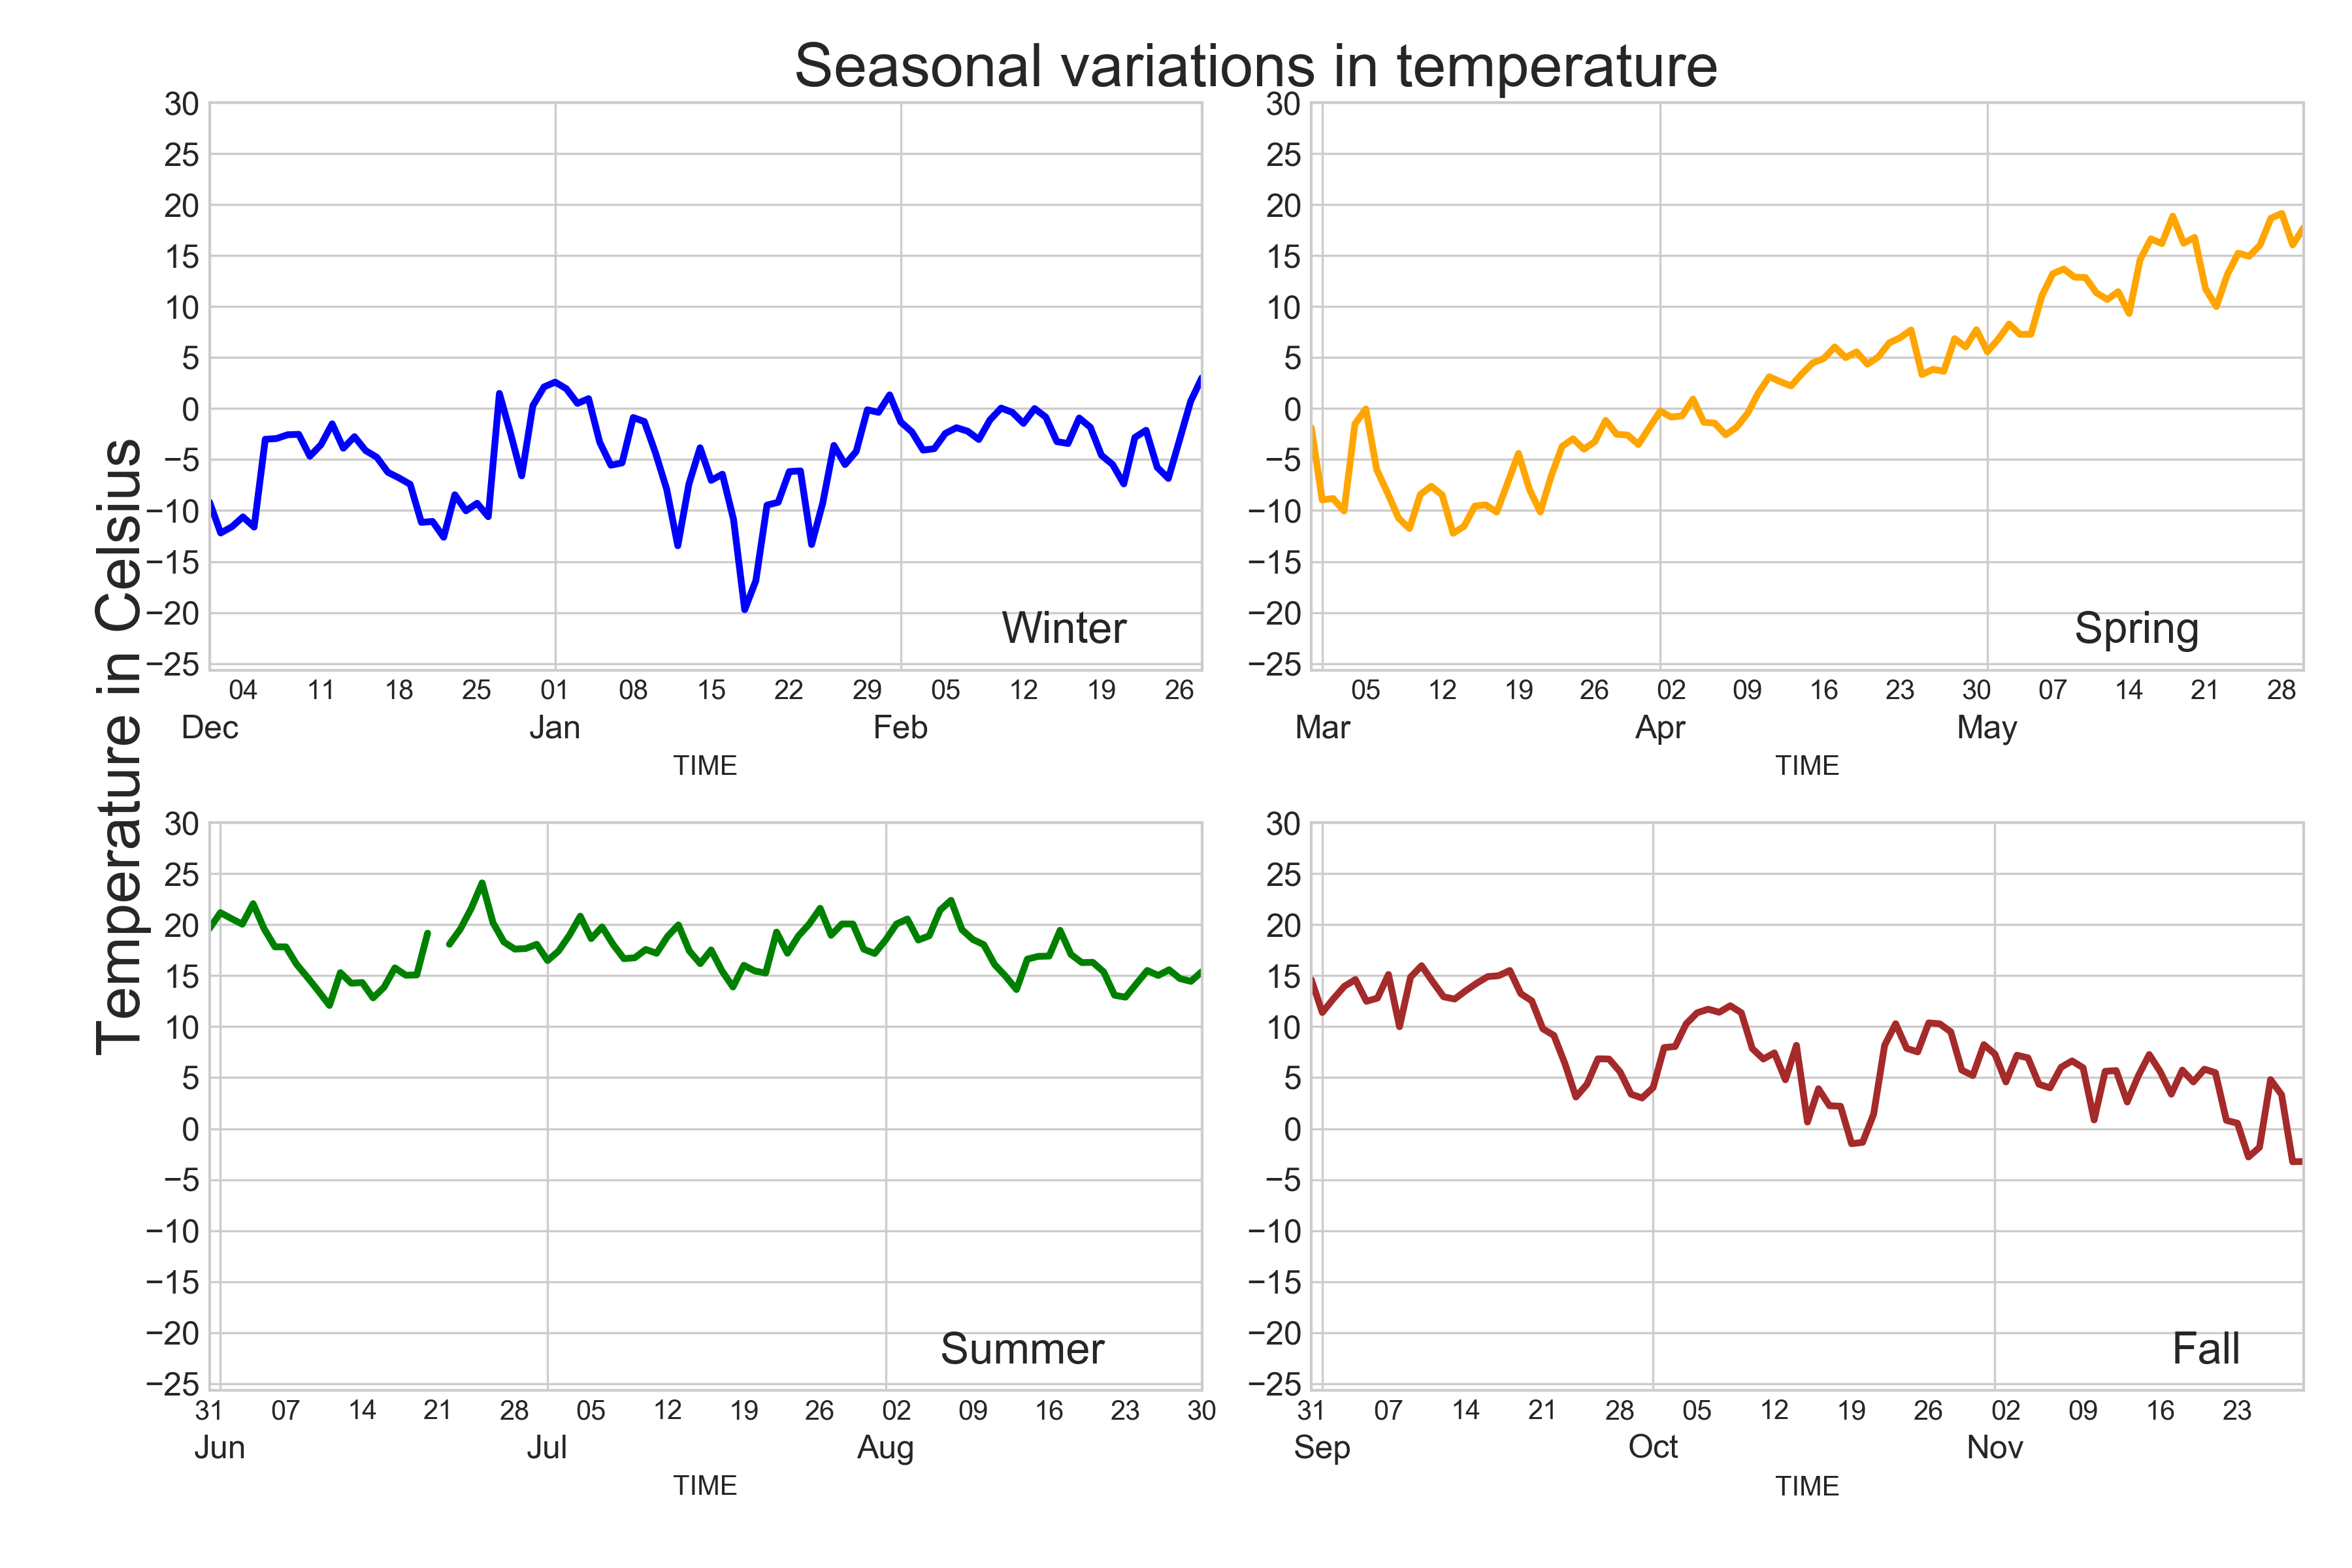
[Source](https://geo-python-site.readthedocs.io/en/2017.1/lessons/L7/pandas-plotting.html)

<Axes: >

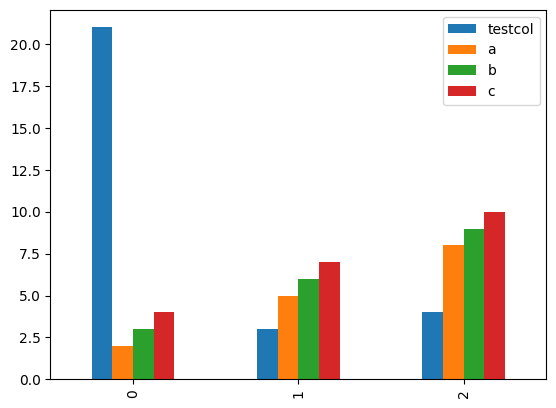

In [21]:
df2.plot(kind='bar')


**ADVANCED DATA ANALYSIS WITH Pandas**

We will use hourly weather data from Helsinki for our data analysis


In [22]:
import matplotlib.pyplot as plt
from datetime import datetime
#are some of the libraries and resources helping us with this part of the ntebook

In [23]:
fp = "./data/029070.txt"
data = pd.read_csv(
    fp, delim_whitespace=True, na_values=["*", "**", "***", "****", "*****", "******"]
)
#Ignore the warning below, we have dealt with it


C:\Users\Pranav\AppData\Local\Temp\ipykernel_12080\701165169.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


Let’s see how the data looks by printing the first five rows with the head() function:



In [24]:
data.head()


,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,29070,99999,190101010600,270.0,36.0,NaN,NaN,OVC,NaN,NaN,...,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29070,99999,190101011300,290.0,18.0,NaN,NaN,SCT,NaN,NaN,...,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29070,99999,190101012000,NaN,0.0,NaN,NaN,OVC,NaN,NaN,...,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29070,99999,190101020600,180.0,18.0,NaN,NaN,OVC,NaN,NaN,...,1018.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29070,99999,190101021300,180.0,22.0,NaN,NaN,OVC,NaN,NaN,...,1017.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 We can check all column names by running `data.columns`:



In [25]:
data.columns


Index(['USAF', 'WBAN', 'YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L',
       'M', 'H', 'VSB', 'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2',
       'AW.3', 'W', 'TEMP', 'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01',
       'PCP06', 'PCP24', 'PCPXX', 'SD'],
      dtype='object')

**Renaming columns**

As we saw above some of the column names are a bit awkward and difficult to interpret. Luckily, it is easy to alter labels in a pandas DataFrame using the rename function. In order to change the column names, we need to tell pandas how we want to rename the columns using a dictionary that lists old and new column names

We can define the new column names using a dictionary where we list `key: value` pairs, in which the original column name (the one which will be replaced) is the key and the new column name is the value.



In [26]:
# Create the dictionary with old and new names
new_names = {"YR--MODAHRMN": "TIME", "SPD": "SPEED", "GUS": "GUST"}
# Rename the columns
data = data.rename(columns=new_names)

# Print the new columns
print(data.columns)


Index(['USAF', 'WBAN', 'TIME', 'DIR', 'SPEED', 'GUST', 'CLG', 'SKC', 'L', 'M',
       'H', 'VSB', 'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2', 'AW.3',
       'W', 'TEMP', 'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01',
       'PCP06', 'PCP24', 'PCPXX', 'SD'],
      dtype='object')


it’s always a good idea to check basic properties of the input data before proceeding with the data analysis. Let’s check the:

Number of rows and columns



In [27]:
data.shape


(83567, 33)

Top and bottom rows



In [28]:
data.head()


,USAF,WBAN,TIME,DIR,SPEED,GUST,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,29070,99999,190101010600,270.0,36.0,NaN,NaN,OVC,NaN,NaN,...,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29070,99999,190101011300,290.0,18.0,NaN,NaN,SCT,NaN,NaN,...,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29070,99999,190101012000,NaN,0.0,NaN,NaN,OVC,NaN,NaN,...,1020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29070,99999,190101020600,180.0,18.0,NaN,NaN,OVC,NaN,NaN,...,1018.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29070,99999,190101021300,180.0,22.0,NaN,NaN,OVC,NaN,NaN,...,1017.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.tail()

,USAF,WBAN,TIME,DIR,SPEED,GUST,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
83562,29070,99999,201910011900,47.0,38.0,44.0,NaN,NaN,NaN,NaN,...,986.7,NaN,986.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83563,29070,99999,201910012000,45.0,39.0,49.0,NaN,NaN,NaN,NaN,...,987.1,NaN,986.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83564,29070,99999,201910012100,47.0,38.0,49.0,NaN,NaN,NaN,NaN,...,987.9,NaN,987.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83565,29070,99999,201910012200,46.0,40.0,47.0,NaN,NaN,NaN,NaN,...,988.6,NaN,988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83566,29070,99999,201910012300,44.0,41.0,51.0,NaN,NaN,NaN,NaN,...,989.6,NaN,989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data types of the columns



In [30]:
data.dtypes


USAF       int64
WBAN       int64
TIME       int64
DIR      float64
SPEED    float64
GUST     float64
CLG      float64
SKC       object
L        float64
M        float64
H        float64
VSB      float64
MW       float64
MW.1     float64
MW.2     float64
MW.3     float64
AW       float64
AW.1     float64
AW.2     float64
AW.3     float64
W        float64
TEMP     float64
DEWP     float64
SLP      float64
ALT      float64
STP      float64
MAX      float64
MIN      float64
PCP01    float64
PCP06    float64
PCP24    float64
PCPXX    float64
SD       float64
dtype: object

Descriptive statistics



In [31]:
data.describe()


,USAF,WBAN,TIME,DIR,SPEED,GUST,CLG,L,M,H,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
count,83567.0,83567.0,8.356700e+04,80901.000000,82001.000000,729.000000,7.000000,1.0,1.0,1.0,...,83510.00000,0.0,74295.000000,11136.000000,11136.000000,1.0,0.0,0.0,2.000000,0.0
mean,29070.0,99999.0,2.006396e+11,185.428561,15.549359,24.801097,622.428571,5.0,0.0,0.0,...,1010.64726,NaN,1010.069251,42.405711,37.884429,0.0,NaN,NaN,0.010000,NaN
std,0.0,0.0,2.762736e+09,96.434391,8.215270,8.761818,263.441238,NaN,NaN,NaN,...,12.51679,NaN,12.550041,14.310085,14.789456,NaN,NaN,NaN,0.014142,NaN
min,29070.0,99999.0,1.901010e+11,1.000000,0.000000,11.000000,25.000000,5.0,0.0,0.0,...,960.00000,NaN,950.100000,-13.000000,-19.000000,0.0,NaN,NaN,0.000000,NaN
25%,29070.0,99999.0,2.009081e+11,120.000000,9.000000,17.000000,722.000000,5.0,0.0,0.0,...,1002.70000,NaN,1002.100000,33.000000,29.000000,0.0,NaN,NaN,0.005000,NaN
50%,29070.0,99999.0,2.014103e+11,200.000000,14.000000,25.000000,722.000000,5.0,0.0,0.0,...,1011.00000,NaN,1010.400000,41.000000,37.000000,0.0,NaN,NaN,0.010000,NaN
75%,29070.0,99999.0,2.017043e+11,250.000000,20.000000,31.000000,722.000000,5.0,0.0,0.0,...,1018.70000,NaN,1018.100000,54.000000,49.000000,0.0,NaN,NaN,0.015000,NaN
max,29070.0,99999.0,2.019100e+11,360.000000,62.000000,51.000000,722.000000,5.0,0.0,0.0,...,1056.70000,NaN,1054.000000,83.000000,73.000000,0.0,NaN,NaN,0.020000,NaN


Here we can see that there are varying number of observations per column (look at the count row above), because some of the columns have missing values.

Using your own functions in pandas



In [32]:
def fahr_to_celsius(temp_fahrenheit):
    """Function to convert Fahrenheit temperature into Celsius.

    Parameters
    ----------

    temp_fahrenheit: int | float
        Input temperature in Fahrenheit (should be a number)

    Returns
    -------

    Temperature in Celsius (float)
    """

    # Convert the Fahrenheit into Celsius
    converted_temp = (temp_fahrenheit - 32) / 1.8

    return converted_temp

data["TEMP_C"] = data["TEMP"].apply(fahr_to_celsius)


**Datetime**

In pandas, we can also convert dates and times into a new data type called `datetime` using the `pandas.to_datetime()` function.



In [33]:
# Convert character strings to datetime
data["DATE"] = pd.to_datetime(data["TIME"])


With the datetime column, we can now extract different time units using the `pandas.Series.dt` accessor.



In [34]:
data["DATE"].dt.date

0        1970-01-01
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
83562    1970-01-01
83563    1970-01-01
83564    1970-01-01
83565    1970-01-01
83566    1970-01-01
Name: DATE, Length: 83567, dtype: object

We can also combine the datetime functionalities with other methods from pandas. For example, we can check the number of unique years in our input data:


In [35]:

data["DATE"].dt.year.nunique()


1

**Plotting**

We can start by selecting data from different seasons of the year in 2012/2013:

* Winter (December 2012 - February 2013)

* Spring (March 2013 - May 2013)

* Summer (June 2013 - August 2013)

* Autumn (Septempber 2013 - November 2013)



In [38]:
winter = data.loc[(data["DATE"] >= datetime(1970,1,1)) & (data["DATE"] <= datetime(1970,4,1))]
print(winter)
winter_temps = winter["TEMP_C"]

spring = data.loc[(data["DATE"] >= datetime(1970,4,1)) & (data["DATE"] <= datetime(1970,7,1))]
spring_temps = spring["TEMP_C"]

summer = data.loc[(data["DATE"] >= datetime(1970,7,1)) & (data["DATE"] <= datetime(1970,10,1))]
summer_temps = summer["TEMP_C"]

autumn = data.loc[(data["DATE"] >= datetime(1970,10,1)) & (data["DATE"] <= datetime(1970,12,1))]
autumn_temps = autumn["TEMP_C"]


        USAF   WBAN          TIME    DIR  SPEED  GUST  CLG  SKC   L   M  ...  \
0      29070  99999  190101010600  270.0   36.0   NaN  NaN  OVC NaN NaN  ...   
1      29070  99999  190101011300  290.0   18.0   NaN  NaN  SCT NaN NaN  ...   
2      29070  99999  190101012000    NaN    0.0   NaN  NaN  OVC NaN NaN  ...   
3      29070  99999  190101020600  180.0   18.0   NaN  NaN  OVC NaN NaN  ...   
4      29070  99999  190101021300  180.0   22.0   NaN  NaN  OVC NaN NaN  ...   
...      ...    ...           ...    ...    ...   ...  ...  ...  ..  ..  ...   
83562  29070  99999  201910011900   47.0   38.0  44.0  NaN  NaN NaN NaN  ...   
83563  29070  99999  201910012000   45.0   39.0  49.0  NaN  NaN NaN NaN  ...   
83564  29070  99999  201910012100   47.0   38.0  49.0  NaN  NaN NaN NaN  ...   
83565  29070  99999  201910012200   46.0   40.0  47.0  NaN  NaN NaN NaN  ...   
83566  29070  99999  201910012300   44.0   41.0  51.0  NaN  NaN NaN NaN  ...   

         STP  MAX  MIN  PCP01  PCP06  P

Now we can plot our data to see how the different individual seasons look.



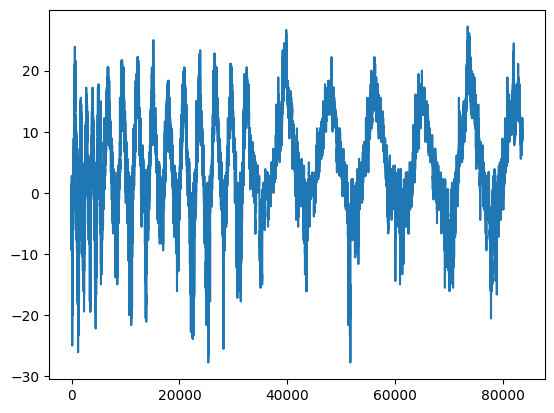

In [39]:
plt.plot(winter_temps)

This was just an introductory example to what can be done with datasets and dataframes.

**APPLICATIONS OF DATAFRAMES**

They are similar to spreadsheets, or SQL tables.
Pandas is used for large-scale data analysis in areas such as finance, astronomy, economics, statistics etc. It stores matrix data very effectively. This makes it useful for all machine learning methods (they use linear algebra). 

DataFrames seamlessly integrate with other data science and machine learning libraries in Python, such as NumPy, SciPy. 

Sources:
1. [Pandas Docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
2. [Numpy Docs](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
3. [Python Docs](https://docs.python.org/3/tutorial/datastructures.html)
4. [Geopython Github Wiki Pages](https://geo-python.github.io/2017/lessons/L7/pandas-plotting.html)
5. [ReadTheDocs, GeoPython](!https://geo-python-site.readthedocs.io/en/latest/notebooks/L6/advanced-data-processing-with-pandas.html#downloading-the-data)